In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("../database/vgsales.csv")

In [4]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
df.dropna(subset=["Year", "Publisher"], inplace=True)

In [9]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [10]:
df.Year = df["Year"].astype(float).astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


In [12]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [13]:
df.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [14]:
df.groupby("Year").describe()

Rank                                                                   \
       count          mean          std      min       25%      50%       75%   
Year                                                                            
1980     9.0   3314.000000  2454.841288    259.0   1768.00   2671.0   5368.00   
1981    46.0   4141.043478  2382.302425    240.0   2167.25   4244.5   5743.00   
1982    36.0   4144.055556  2195.338359     90.0   2654.25   3734.0   5462.75   
1983    17.0   3338.764706  2228.613401    422.0   1811.00   2674.0   4782.00   
1984    14.0   1636.500000  1575.252593     10.0    802.00   1281.0   1804.25   
1985    14.0   3964.642857  4929.608139      2.0   1319.50   2041.5   4231.50   
1986    21.0   1713.619048  1479.270140    128.0    739.00   1429.0   1793.00   
1987    16.0   3418.812500  3669.890211    252.0    732.75   2352.0   4245.75   
1988    15.0   2478.733333  3787.131094     23.0    476.00   1248.0   2208.00   
1989    17.0   2362.117647  3369.016397      6.0    777.00   1144.0   1861.00   
1990    16.0   1569.125000  1711.256882     19.0    494.25   1236.0   1739.00   
1991    41.0   5190.756098  3513.075318    232.0   2063.00   5035.0   7096.00   
1992    43.0   4858.744186  4846.992490     51.0    687.50   2635.0   8575.00   
1993    60.0   6312.700000  4499.737300     58.0   2093.50   5249.5  10279.00   
1994   121.0   7180.917355  4637.878077     72.0   3437.00   6310.0  11543.00   
1995   219.0   8582.621005  4269.995942    188.0   5269.00   9243.0  12093.00   
1996   263.0   7268.714829  4436.834972      5.0   3676.50   7227.0  10747.50   
1997   289.0   6563.937716  4184.935314     53.0   2894.00   6219.0   9658.00   
1998   379.0   6922.137203  4508.672510     31.0   2875.00   6577.0  11036.50   
1999   338.0   6470.544379  4279.025539     13.0   3067.50   5848.5   9671.75   
2000   349.0   6809.088825  4096.777466    133.0   3362.00   6648.0  10066.00   
2001   482.0   7026.493776  4461.977252     29.0   3357.00   6670.0  10592.00   
2002   829.0   8239.068758  4531.359191     25.0   4479.00   8385.0  11920.00   
2003   775.0   7885.154839  4559.359382    105.0   4037.00   7669.0  11727.00   
2004   744.0   7630.733871  4577.230798     18.0   3638.50   7457.5  11527.75   
2005   936.0   8205.422009  4351.322925     11.0   4505.50   8270.5  11749.00   
2006  1008.0   9487.691468  4834.353906      1.0   5442.00  10191.0  13824.25   
2007  1201.0   8611.944213  4984.610549     14.0   4227.00   8741.0  13179.00   
2008  1428.0   8464.990896  4832.807690      3.0   4110.50   8441.0  12581.75   
2009  1431.0   8679.398323  4642.524937      4.0   4777.50   8676.0  12718.00   
2010  1257.0   8778.667462  4732.589445     16.0   4825.00   8966.0  12903.00   
2011  1136.0   8782.597711  4556.584605     30.0   5223.50   9207.5  12440.75   
2012   655.0   8436.007634  5099.140269     35.0   3718.50   8263.0  13388.00   
2013   546.0   8055.597070  5146.300978     17.0   3206.50   7825.0  12807.50   
2014   580.0   8290.924138  5025.461542     45.0   3683.25   8462.0  12478.50   
2015   614.0   9797.796417  5068.232870     34.0   5176.25  11165.0  14288.25   
2016   342.0  11402.043860  4496.513605    222.0   8199.75  12933.0  15139.50   
2017     3.0  15692.666667  1129.846155  14393.0  15318.50  16244.0  16342.50   
2020     1.0   5959.000000          NaN   5959.0   5959.00   5959.0   5959.00   

              NA_Sales            ... Other_Sales        Global_Sales  \
          max    count      mean  ...         75%    max        count   
Year                              ...                                   
1980   6898.0      9.0  1.176667  ...      0.0100   0.05          9.0   
1981   9497.0     46.0  0.726087  ...      0.0100   0.05         46.0   
1982   9108.0     36.0  0.747778  ...      0.0100   0.08         36.0   
1983   8459.0     17.0  0.456471  ...      0.0100   0.02         17.0   
1984   6298.0     14.0  2.377143  ...      0.0275   0.47         14.0   
1985  15870.0     14.

In [15]:
df.groupby("Publisher").describe()

Rank                                      \
                             count          mean          std      min   
Publisher                                                                
10TACLE Studios                3.0  14064.000000  1680.032440  12351.0   
1C Company                     3.0  14412.333333  1797.610173  13059.0   
20th Century Fox Video Games   5.0   5453.200000  1779.644824   2598.0   
2D Boy                         1.0  14013.000000          NaN  14013.0   
3DO                           36.0   8037.333333  3759.551721   1546.0   
...                            ...           ...          ...      ...   
id Software                    1.0  14602.000000          NaN  14602.0   
imageepoch Inc.                2.0  15344.000000  1530.179074  14262.0   
inXile Entertainment           1.0  10758.000000          NaN  10758.0   
mixi, Inc                      1.0   2411.000000          NaN   2411.0   
responDESIGN                   2.0  12316.500000  1936.765474  10947.0   

                                                                    Year  \
                                   25%      50%       75%      max count   
Publisher                                                                  
10TACLE Studios               13241.50  14132.0  14920.50  15709.0   3.0   
1C Company                    13392.50  13726.0  15089.00  16452.0   3.0   
20th Century Fox Video Games   5391.00   5397.0   6730.00   7150.0   5.0   
2D Boy                        14013.00  14013.0  14013.00  14013.0   1.0   
3DO                            5070.00   8262.5  10861.25  16311.0  36.0   
...                                ...      ...       ...      ...   ...   
id Software                   14602.00  14602.0  14602.00  14602.0   1.0   
imageepoch Inc.               14803.00  15344.0  15885.00  16426.0   2.0   
inXile Entertainment          10758.00  10758.0  10758.00  10758.0   1.0   
mixi, Inc                      2411.00   2411.0   2411.00   2411.0   1.0   
responDESIGN                  11631.75  12316.5  13001.25  13686.0   2.0   

                                           ... Other_Sales       Global_Sales  \
                                     mean  ...         75%   max        count   
Publisher                                  ...                                  
10TACLE Studios               2006.666667  ...      0.0000  0.00          3.0   
1C Company                    2010.333333  ...      0.0100  0.01          3.0   
20th Century Fox Video Games  1981.400000  ...      0.0000  0.01          5.0   
2D Boy                        2008.000000  ...      0.0100  0.01          1.0   
3DO                           2000.500000  ...      0.0200  0.06         36.0   
...                                   ...  ...         ...   ...          ...   
id Software                   1992.000000  ...      0.0000  0.00          1.0   
imageepoch Inc.               2014.000000  ...      0.0000  0.00          2.0   
inXile Entertainment          2015.000000  ...      0.0100  0.01          1.0   
mixi, Inc                     2015.000000  ...      0.0000  0.00          1.0   
responDESIGN                  2004.500000  ...      0.0075  0.01          2.0   

                                                                               \
                                  mean       std   min     25%    50%     75%   
Publisher                                                                       
10TACLE Studios               0.036667  0.020817  0.02  0.0250  0.030  0.0450   
1C Company                    0.033333  0.020817  0.01  0.0250  0.040  0.0450   
20th Century Fox Video Games  0.388000  0.231019  0.22  0.2500  0.340  0.3400   
2D Boy                        0.040000       NaN  0.04  0.0400  0.040  0.0400   
3DO                           0.281111  0.272636  0.01  0.0950  0.170  0.3750   
...                                ...       ...   ...     ...    ...     ...   
id Software                   0.030000       NaN  0.03  0.0300  

In [16]:
df.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [17]:
japan = df.groupby("Year")["JP_Sales"].sum()

<AxesSubplot:title={'center':'Japan Total Sales'}, xlabel='Year', ylabel='Total sales'>

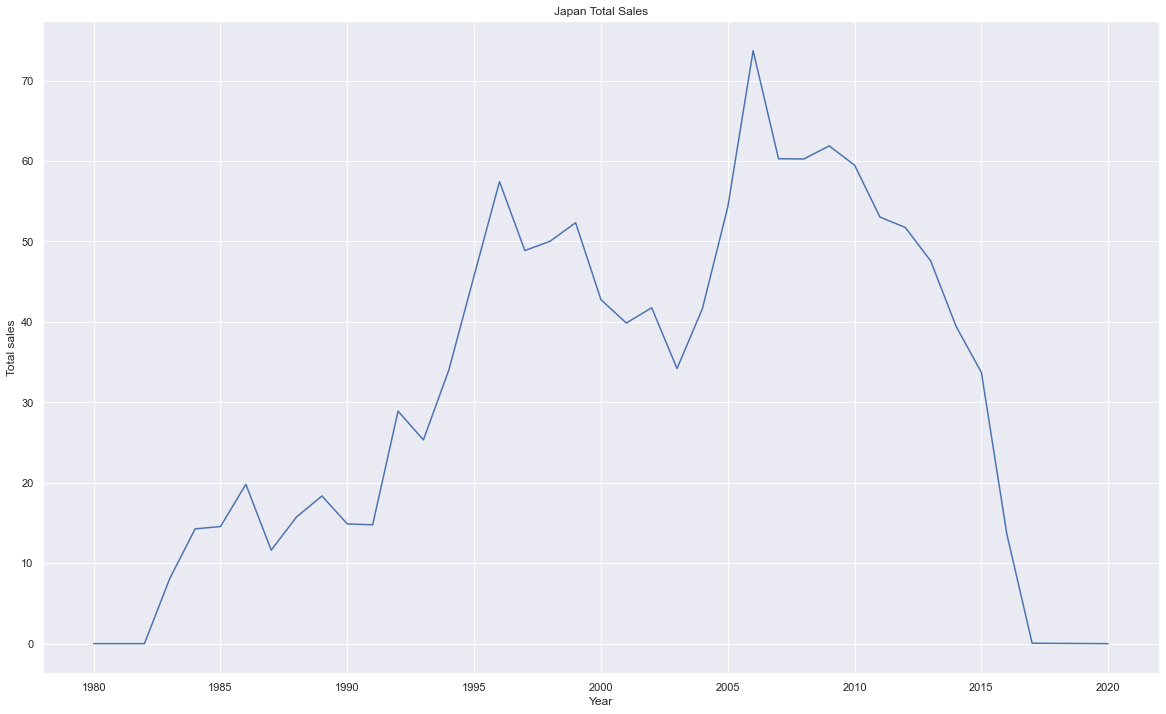

In [26]:
plt.figure(figsize=(20,12))
plt.title("Japan Total Sales")
plt.ylabel("Total sales")
plt.xlabel("Years")
japan.plot()

In [21]:
df.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [22]:
America_sales = df.groupby("Year")["NA_Sales"].sum()

Text(0, 0.5, 'Total sales')

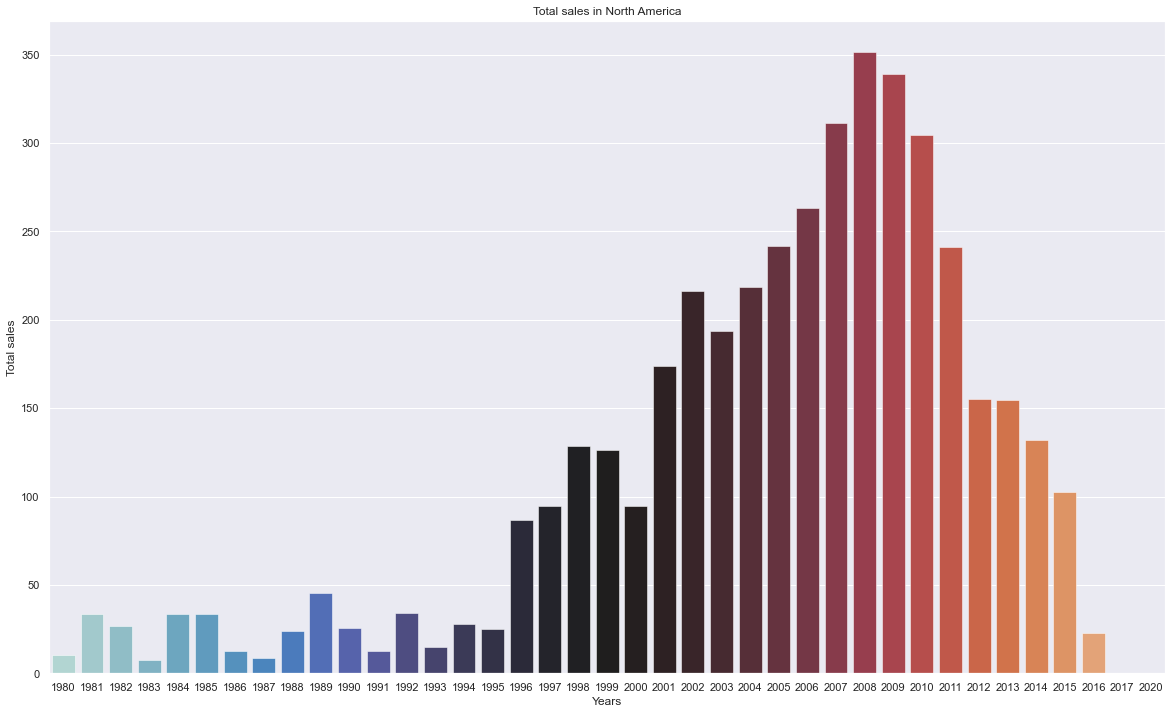

In [25]:
plt.figure(figsize=(20,12))
sns.barplot(x=America_sales.index, y=America_sales.values, palette = "icefire", linewidth=0.5)
plt.title("Total sales in North America")
plt.xlabel("Years")
plt.ylabel("Total sales")

In [27]:
df.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


Text(0.5, 1.0, 'Total sales in Europe')

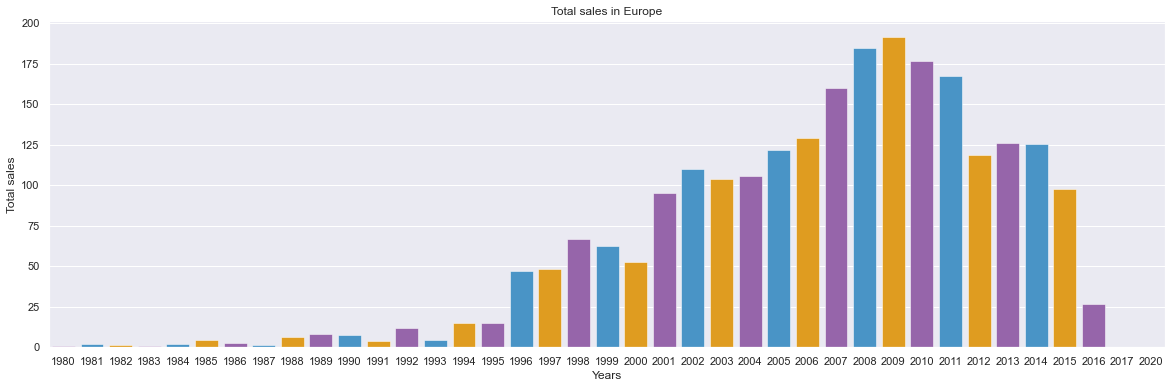

In [31]:
Europe = df.groupby("Year")["EU_Sales"].sum()
plt.figure(figsize=(20,6))
colors = ["#9b59b6", "#3498db", "orange"]
sns.barplot(x=Europe.index, y=Europe.values, palette = colors, linewidth=0.5)
plt.xlabel("Years")
plt.ylabel("Total sales")
plt.title("Total sales in Europe")

# Percentage sales by region

In [34]:
df.head(2)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [36]:
Japan_sales = df["JP_Sales"].sum()
global_sales = df["Global_Sales"].sum()
Percent_japan = ((Japan_sales/global_sales)*100)
Percent_japan

14.574153112187178

In [42]:
America_Sales = df["NA_Sales"].sum()
global_sales = df["Global_Sales"].sum()
percent_NA = (America_Sales/global_sales)*100
percent_NA

49.11103873481186

In [43]:
Europe_sales = df["EU_Sales"].sum()
global_sales = df["Global_Sales"].sum()
percent_EU = (Europe_sales/global_sales)*100
percent_EU

27.31160001679534

C:\Users\MR SAMMI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '% sales by region')

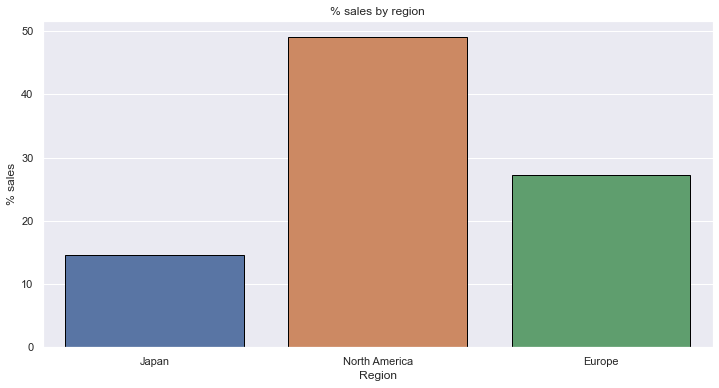

In [53]:
df["Percent_JP"] = Percent_japan
df["Percent_NA"] = percent_NA
df["Percent_EU"] = percent_EU
x_axis = ["Japan", "North America", "Europe"]
data = [Percent_japan, percent_NA, percent_EU]
plt.figure(figsize=(12,6))
sns.barplot(x_axis, data, edgecolor="black")
plt.xlabel("Region")
plt.ylabel("% sales")
plt.title("% sales by region")

In [54]:
df.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Percent_JP,Percent_NA,Percent_EU
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,14.574153,49.111039,27.3116
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,14.574153,49.111039,27.3116


# game sold by name

In [73]:
df.Name.unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Plushees', 'Woody Woodpecker in Crazy Castle 5', 'Know How 2'],
      dtype=object)

C:\Users\MR SAMMI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


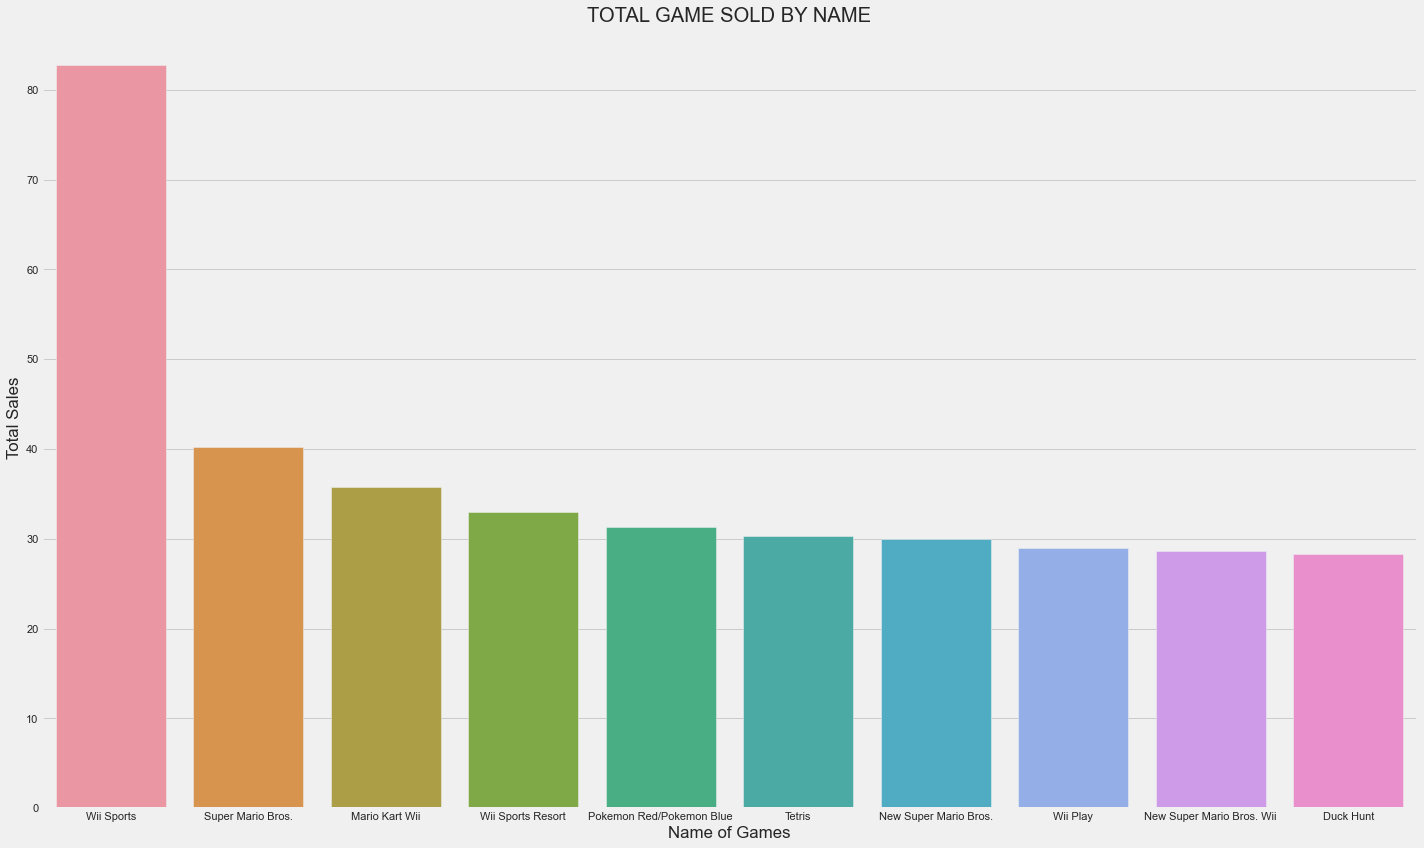

In [68]:
game_sold = df[df["Global_Sales"] >25]
plt.style.use("fivethirtyeight")
plt.figure(figsize = (20, 12))
sns.barplot(game_sold["Name"], game_sold["Global_Sales"])
plt.xlabel("Name of Games")
plt.ylabel("Total Sales")
plt.title("TOTAL GAME SOLD BY NAME")
plt.tight_layout()

In [69]:
df.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Percent_JP,Percent_NA,Percent_EU
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,14.574153,49.111039,27.3116
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,14.574153,49.111039,27.3116


In [70]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
genre_sold = df.groupby("Genre")["Global_sales"].sum()
plt.figure(figsize=(17,8))
sns.barplot(genre_sold.index, genre_sold.values)